In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [25]:
noun_df = pd.read_csv('noun_celine.csv', sep ='|', encoding = 'utf-8')

In [26]:
noun_df.head()

,article,noun
0,"['골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sand...","['골드', '장식', '포인트', '케이프', '체크', '코트', '산드로', ..."
1,"[' 빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, 셀린느(Celine).']","['빈티', '주름', '워싱', '특징', '데님', '팬츠', '가격', '미정..."
2,[' 1970년대 에스닉한 분위기가 물씬 풍기는 셀린느의 방패 모양 숄더백.'],"['에스', '분위기', '물씬', '셀린느', '방패', '모양', '숄더백']"
3,"['재킷, 셔츠, 슈즈는 셀린느(Celine), 블랙 스커트는 렉토, 이어링은 스타...","['재킷', '셔츠', '슈즈', '셀린느', '블랙', '스커트', '렉토', '..."
4,"['재킷, 셔츠, 네크리스는 모두 셀린느(Celine), 팬츠는 다잉브리드, 슈즈는...","['재킷', '셔츠', '크리스', '모두', '셀린느', '팬츠', '다잉브', ..."


In [12]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', encoding = 'utf-8', sep ='|')

In [14]:
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [15]:
mag_ch['ADFN'].head()

0                        [메탈, 레진, 귀고리, CHANEL, CHANEL]
1    [인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상...
2                     [체인, 진주, 결합, 우아함을, CHANEL, 액세서리]
3    [주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르...
4    [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
Name: ADFN, dtype: object

### top50 리스트 생성

In [16]:
top200 = pd.read_csv('./magazine/final/ch_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8')

In [17]:
top200

,word,count
0,CHANEL,5469
1,브랜드,921
2,KARL,882
3,쇼,735
4,모델,716
...,...,...
195,시계,113
196,장인,113
197,진주,112
198,강조,112


In [21]:
top50 = []
for i in range(50):
    top50.append(top200.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '제품', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '새로운', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '링', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '완성']


### top50만 남기기

In [22]:
len(mag_ch)

1450

In [23]:
top50_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [24]:
len(top50_word)

1450

In [33]:
top50_word[0]

['CHANEL', 'CHANEL']

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [26]:
# 어프라이어리(Apriori)
from apyori import apriori

In [31]:
type(top50_word)

list

In [30]:
top50_word[0][0]

'CHANEL'

In [32]:
# # 지지도(support) : P(A∩B)
# result = list(apriori(top50_word, min_support = 0.01))
# df = pd.DataFrame(result)
# df['length'] = df['items'].apply(lambda x:len(x))
# df = df[(df['length'] == 2) 
#         & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
# df.head(10)

### networkx 그래프 정의

In [41]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [42]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [48]:
pos = nx.spring_layout(G)

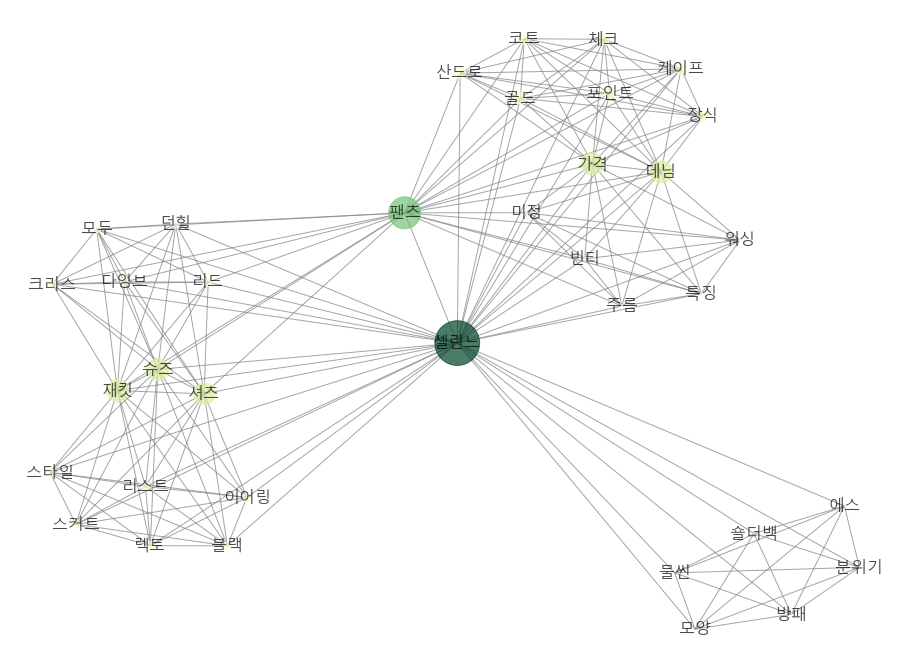

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)
plt.show()
plt.savefig('./celine_network.png', bbox_inches = 'tight')

## 실제 데이터

In [ ]:
# 지지도(support) : P(A∩B)
result = list(apriori(dd, min_support = 0.01))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)